#선형 회귀
##### https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# rcParams 그림 그릴 때 값을 정해둔다고 생각하면 됨
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\ether\AppData\Local\Temp\ipykernel_26820\2875194864.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('insurance.csv')
# shape > 행렬 개수 알려준다
print('\nNumber of rows and columns in the data set: ',df.shape)

# 상위 5개
df.head()


Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\ether\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


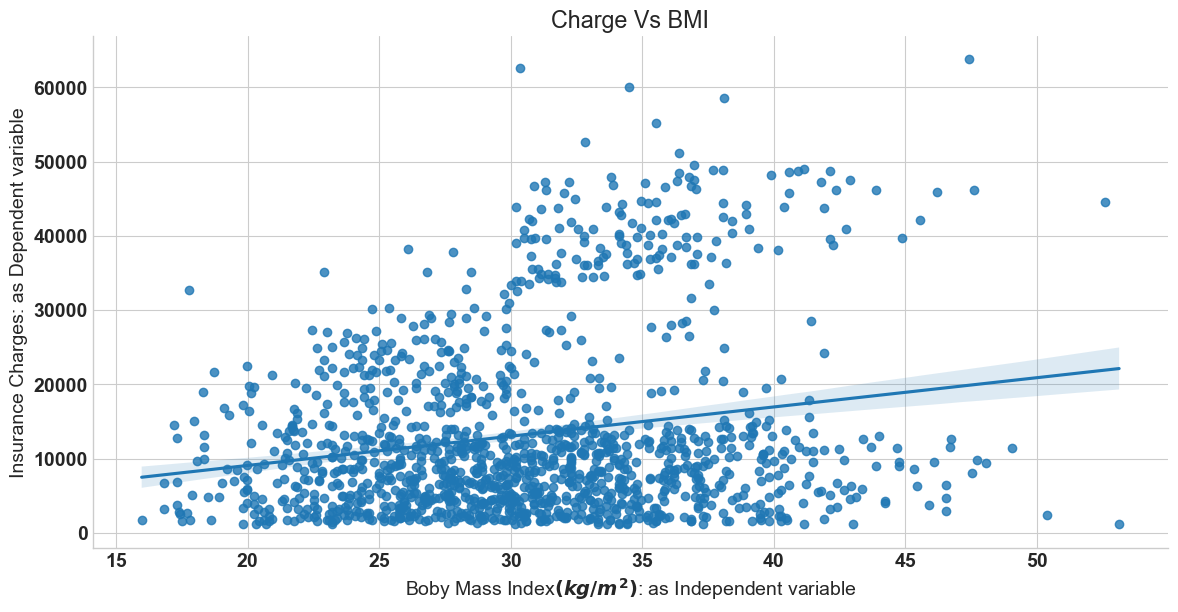

In [3]:
# 자료의 평균값을 지나가는 회귀선이 있음 x, y 입력변수 (열의 이름)
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [4]:
# 데이터 요약
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


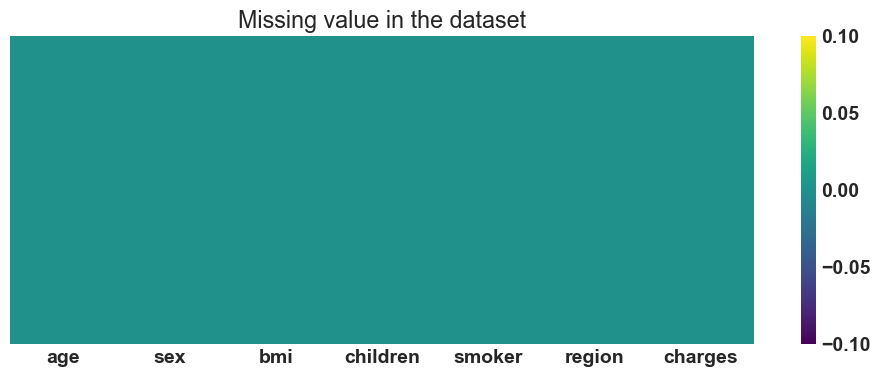

In [5]:
plt.figure(figsize=(12,4))

# isnull > 결측이면 True, cbar > colorbar의 유무, cmap > 히트맵의 색, yticklabels > y축 눈금 레이블
sns.heatmap(df.isnull(),cbar=True,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

C:\Users\ether\AppData\Local\Temp\ipykernel_26820\2311812582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


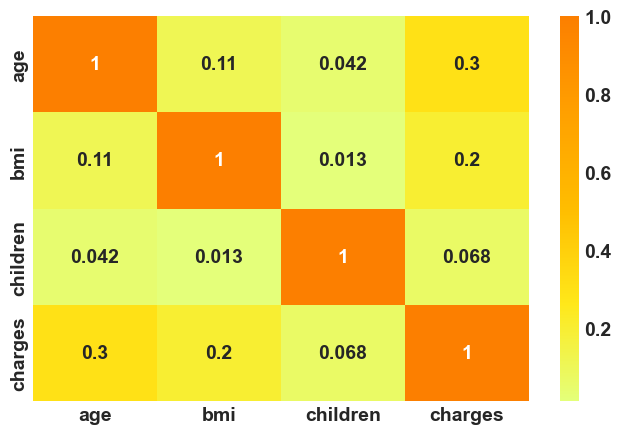

In [6]:
# corr > 각 열의 상관 계수 반환
corr = df.corr()
# annot 셀의 값 표기
sns.heatmap(corr, cmap = 'Wistia', annot= True);

C:\Users\ether\AppData\Local\Temp\ipykernel_26820\1767849493.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\ether\AppData\Local\Temp\ipykernel_26820\1767849493.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=4

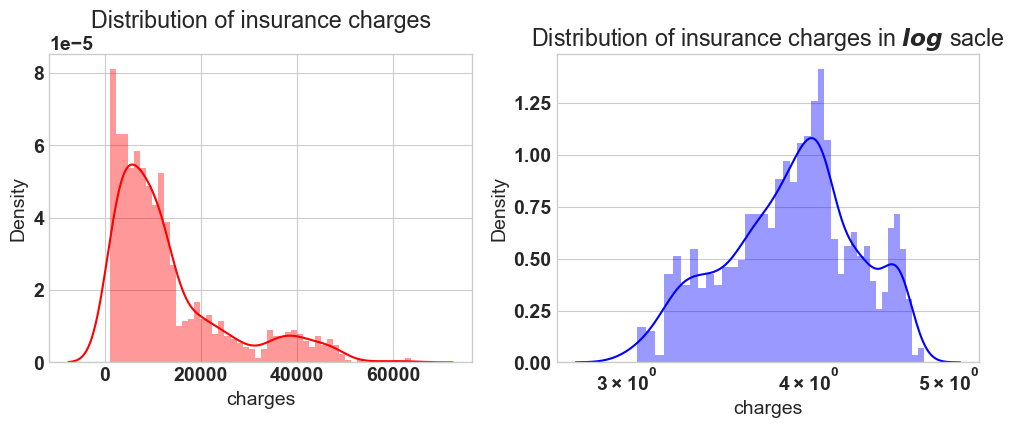

In [7]:
# figure은 큰 틀, ax 들어가는 공간
f= plt.figure(figsize=(12,4))

# ax=f.add_subplot(121) > 행은 1, 열은 2로 나누고 첫번째
ax=f.add_subplot(121)
# distplot > 선 그래프로 변화 추이를 나타내기 위한 툴
# df에서 charges 불러와서 bins > 막대 수 조절
# ax는 플롯을 그리려는 축 개체
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

# ax=f.add_subplot(122) > 행은 1, 열은 2로 나누고 두번째
ax=f.add_subplot(122)
# 데이터의 로그 스케일링은 여기서 끝남
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
# x축 표기 값을 로그 변환
ax.set_xscale('log');

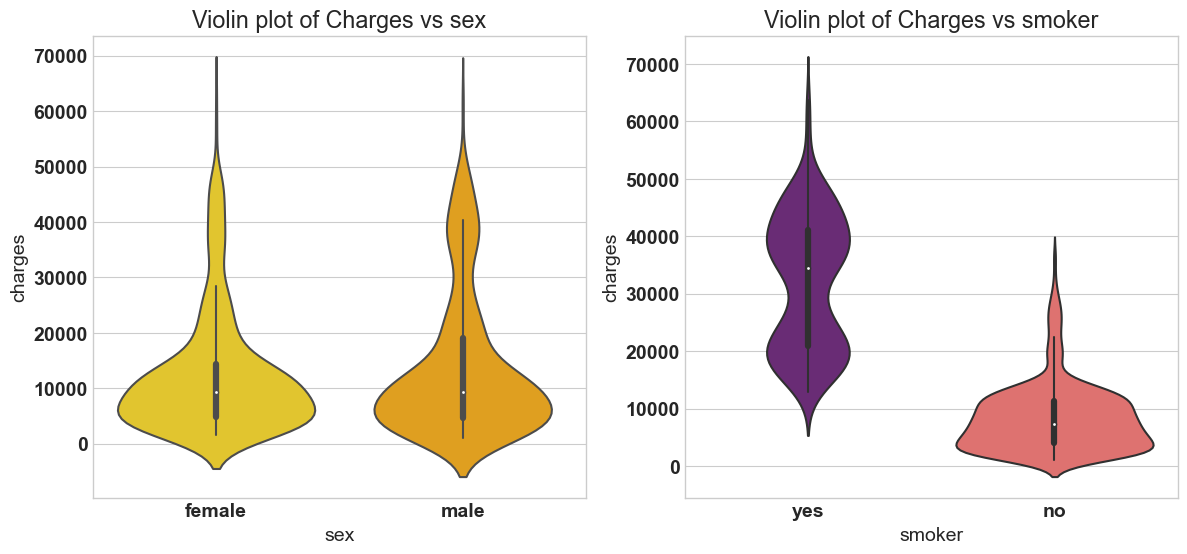

In [8]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
# palette > 이런 색상 정하는 코드는 원하는 색에 맞춰 사용 / 위에서 사용한 color='b' 도 가능함
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

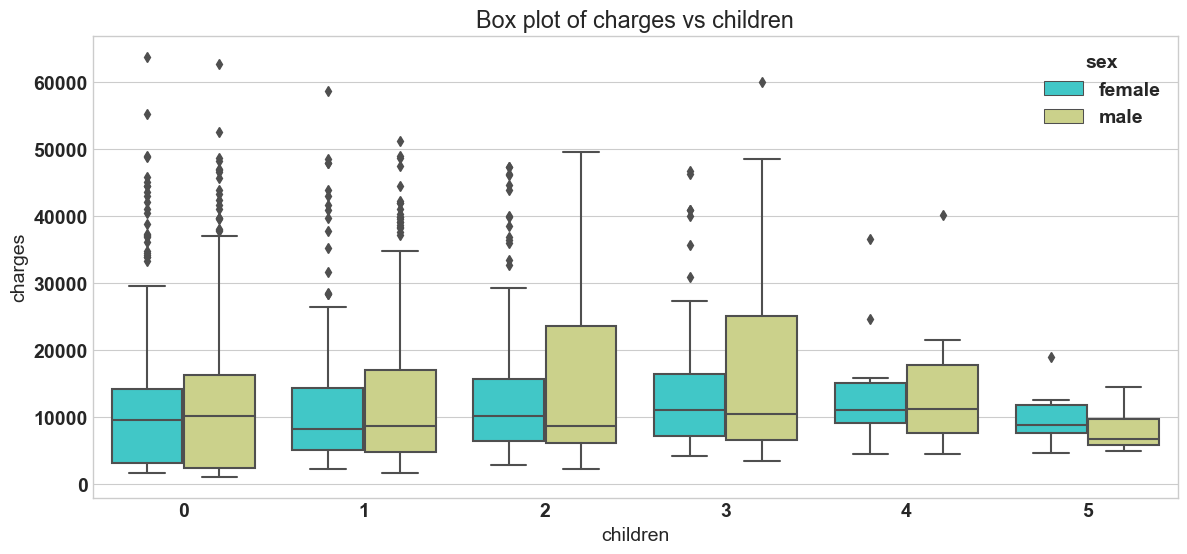

In [9]:
plt.figure(figsize=(14,6))

# hue > 색을 통해 구분할 값
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [10]:
# children을 기준으로 그룹화 / 평균, 최소, 최대 적용 charges에 대해 / .agg 데이터 집계에 사용
df.groupby('children').agg(['mean','min','max'])['charges']

C:\Users\ether\AppData\Local\Temp\ipykernel_26820\4150216699.py:2: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


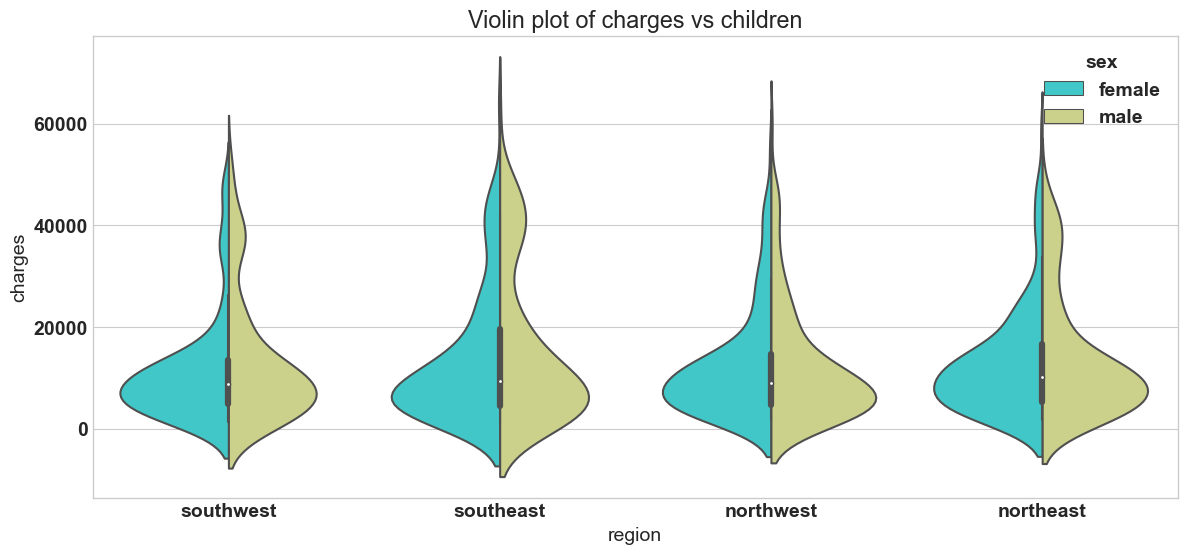

In [11]:
plt.figure(figsize=(14,6))
# split > region 데이터 4종류로 분할
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

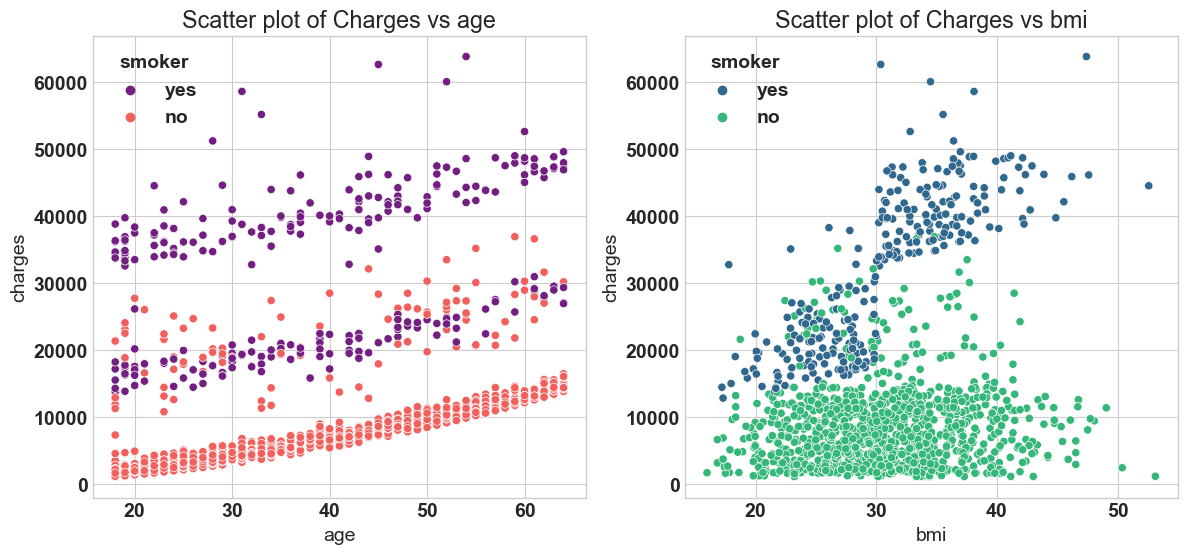

In [12]:
f = plt.figure(figsize=(14,6))
# hue를 통해 한 차원 늘려 3개의 차원에서 값을 파악할 수 있음
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
# fig 데이터를 저장
plt.savefig('sc.png');

In [13]:
categorical_columns = ['sex','children', 'smoker', 'region']
# get_dummies 원핫 인코딩하는 함수
# prefix 컬럼 이름 앞에 붙을 접두사, prefix_sep 중간에 _를 포함 시켜준다, drop_first 첫번째 범주 drop 할건지
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [14]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [15]:
# boxcox 변환은 분산을 안정화하고 정규 분포에 근사하기 위해 사용되는 통계 기법
from scipy.stats import boxcox
# boxcox 함수를 가져와서 변환 / alpha 신뢰 구간 설정
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

# lam(람다) 데이터를 정규분포에 자동으로 가깝게 함 / ci(신뢰 구간) 람다가 떨어질 가능성이 있는 범위를 나타냄
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [16]:
# 자연로그 값 반환
df_encode['charges'] = np.log(df_encode['charges'])

In [17]:
# train_test_split 데이터셋 분리
from sklearn.model_selection import train_test_split
# drop을 통해 charges 기준이고 axis = 1 > 열 방향으로. axis = 0 > 행 방향으로 수행
X = df_encode.drop('charges',axis=1)
y = df_encode['charges']

# 데이터를 나누는데 X,y는 대상이고 test = 30%, 70% 훈련, random_state > 난수 생성
# 학습과 데이터 분리했을 때 값을 일정하게 맞춰주기 위해 random_state 해줌
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)
print(list(X.columns.values))

['age', 'bmi', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5', 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest']


In [18]:
# np.c_ > 같은 원소끼리 합치기 / np.r_ > axis 값에 따라 아래 위, 양옆이 달라짐
# np.ones 데이터 값이 1인 배열,  X_train.shape[0] > 행의 수, 1 > 열의 수
# 1로 만든 데이터와 X_train 데이터를 np.c_ > 원소끼리 합쳐라
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# matmul > 행렬곱 함수 / np.linalg.inv > 역행렬 / 선형회귀에 최적 선을 찾는 행렬연산 부분이라고 함ㅠㅠㅠ
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [19]:
# X_train_0.shape[1] > 열의 수 / 각 반복마다 'theta_'+str(i) 문자열 생성
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
# 'intersect:x_0=1' 값을 넣고 X.columns.values 리스트 값을 넣어라
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
print(columns)

['intersect:x_0=1', 'age', 'bmi', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3', 'OHE_4', 'OHE_5', 'OHE_yes', 'OHE_northwest', 'OHE_southeast', 'OHE_southwest']


In [20]:
from sklearn.linear_model import LinearRegression
# LinearRegression() 모델 생성
lin_reg = LinearRegression()
# fit을 통해 학습
lin_reg.fit(X_train,y_train)

# coef_ > 기울기 / intercept_ > 절편
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
# join을 통해 dataframe 합치기 / Series 형태로 불러오는건데 딕셔너리 구조와 비슷함
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [21]:
# 행렬곱
y_pred_norm =  np.matmul(X_test_0,theta)

# 회귀모델에 대한 MSE 값 / X_test_0.shape[0] > 테스트 세트의 행 갯수
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298204
R square obtain for normal equation method is : 0.7795687545055301


#### 직접 predict 짜보기

In [22]:
# X_test 데이터로 예측값 계산
y_pred_sk = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
# y_pred_sk 예측값과 y_test 실제값 간의 MSE 값 저장
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R^2 / X_test 독립변수와 y_test 실제갑
R_square_sk = lin_reg.score(X_test,y_test)

print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


C:\Users\ether\AppData\Local\Temp\ipykernel_26820\2085502333.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


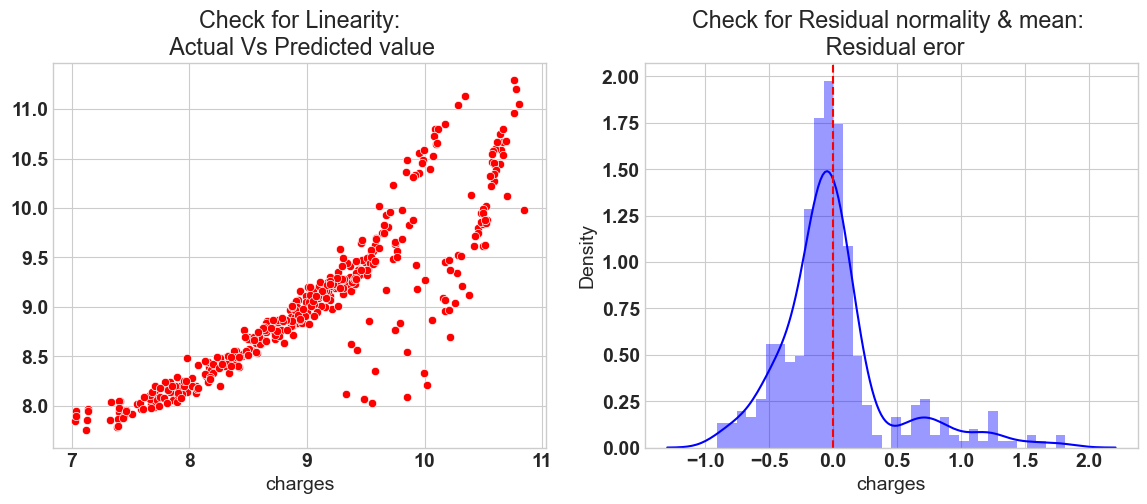

In [29]:
f = plt.figure(figsize=(14,5))
# add_subplot > f에 그림을 추가해라
ax = f.add_subplot(121)

# scatterplot > 산점도 그리기 / x, y 배열 / ax=ax > ax가 나타내는 서브 플롯에 산점도를 그려라
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
# distplot > 막대기 그래프 / y_test - y_pred_sk > 잔차 분포도 그래프 / ax 위치
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
# axvline 수직선을 그려라 / 잔차의 평균 수직선
ax.axvline((y_test - y_pred_sk).mean(),color='r',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

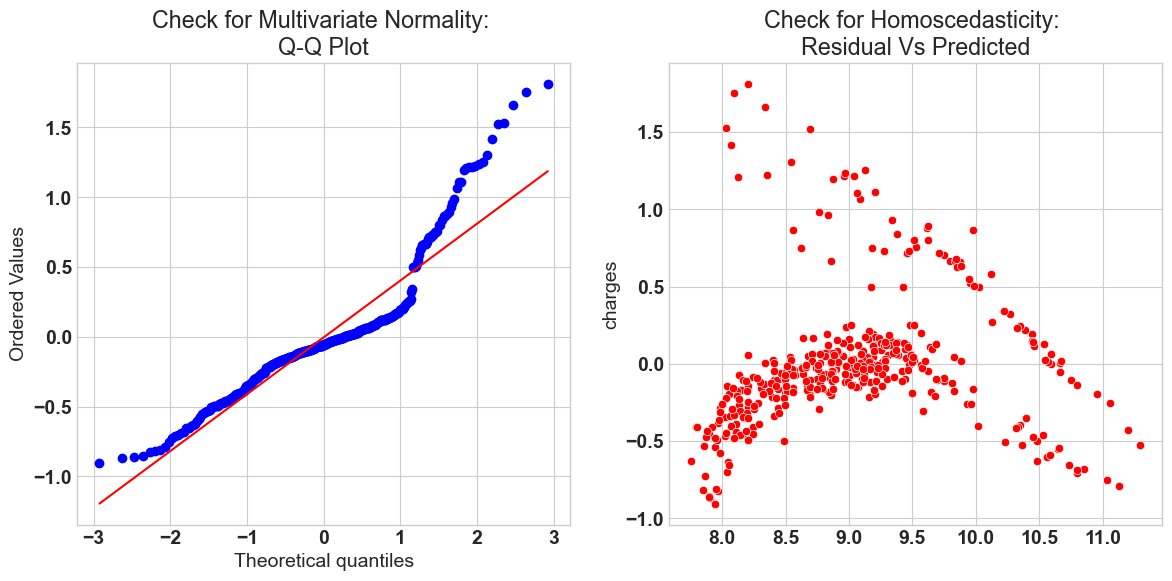

In [27]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
# QQ plot을 사용함
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [28]:
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138